*Основная задача*: Зарегистрируйтесь на платформе Kaggle и скачайте набор данных, и по образцу создайте нейронную сеть. Выведите матрицу ошибок и постарайтесь минимизировать их, подобрав параметры нейронной сети.

In [18]:
import numpy as np # Подключаем библиотеку numpy
import pandas as pd # Библиотека pandas

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

*1. Загрузите данные с площадки Kaggle.*

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/W1llAnn/1tdata-homework/main/3.1pima-indians-diabetes.csv', delimiter=',')
df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [8]:
df.shape

(767, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6       767 non-null    int64  
 1   148     767 non-null    int64  
 2   72      767 non-null    int64  
 3   35      767 non-null    int64  
 4   0       767 non-null    int64  
 5   33.6    767 non-null    float64
 6   0.627   767 non-null    float64
 7   50      767 non-null    int64  
 8   1       767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df.isnull().sum()

6        0
148      0
72       0
35       0
0        0
33.6     0
0.627    0
50       0
1        0
dtype: int64

**Всего 767 строк и 9 колонок, пропусков нет.**

*2. Подготавливаем данные (приводим их к нужным типам данных, проводим базовое EDA, делаем выводы, если возможно).*

Колонки зашифрованы следующим образом:
*   6 - pregnancies - беременность
*   148 - glucose - глюкоза
*   72 - blood_pressure - кровяное давление
*   35 - skin_thickness - толщина кожи
*   0 - insulin - инсулин
*   33.6 - bmi - индекс массы тела
*   0.627 - diabetes_pedigree_function - диабет у родственников (наследственность)
*   50 - age - возраст
*   1 - class - есть диабет или нет

Я изменю колонки для большей "читаемости"

In [12]:
df = df.rename(columns={
    '6': 'pregnancies', 
    '148': 'glucose',
    '72': 'blood_pressure',
    '35': 'skin_thickness',
    '0': 'insulin',
    '33.6': 'bmi',
    '0.627': 'diabetes_pedigree_function',
    '50': 'age',
    '1': 'class',
    })

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pregnancies                 767 non-null    int64  
 1   glucose                     767 non-null    int64  
 2   blood_pressure              767 non-null    int64  
 3   skin_thickness              767 non-null    int64  
 4   insulin                     767 non-null    int64  
 5   bmi                         767 non-null    float64
 6   diabetes_pedigree_function  767 non-null    float64
 7   age                         767 non-null    int64  
 8   class                       767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Все данные имеют тип int64 или float64, никаких преобразований не требуется.**

In [15]:
df.describe()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,class
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<Axes: title={'center': 'pregnancies'}>,
        <Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'blood_pressure'}>],
       [<Axes: title={'center': 'skin_thickness'}>,
        <Axes: title={'center': 'insulin'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'diabetes_pedigree_function'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'class'}>]], dtype=object)

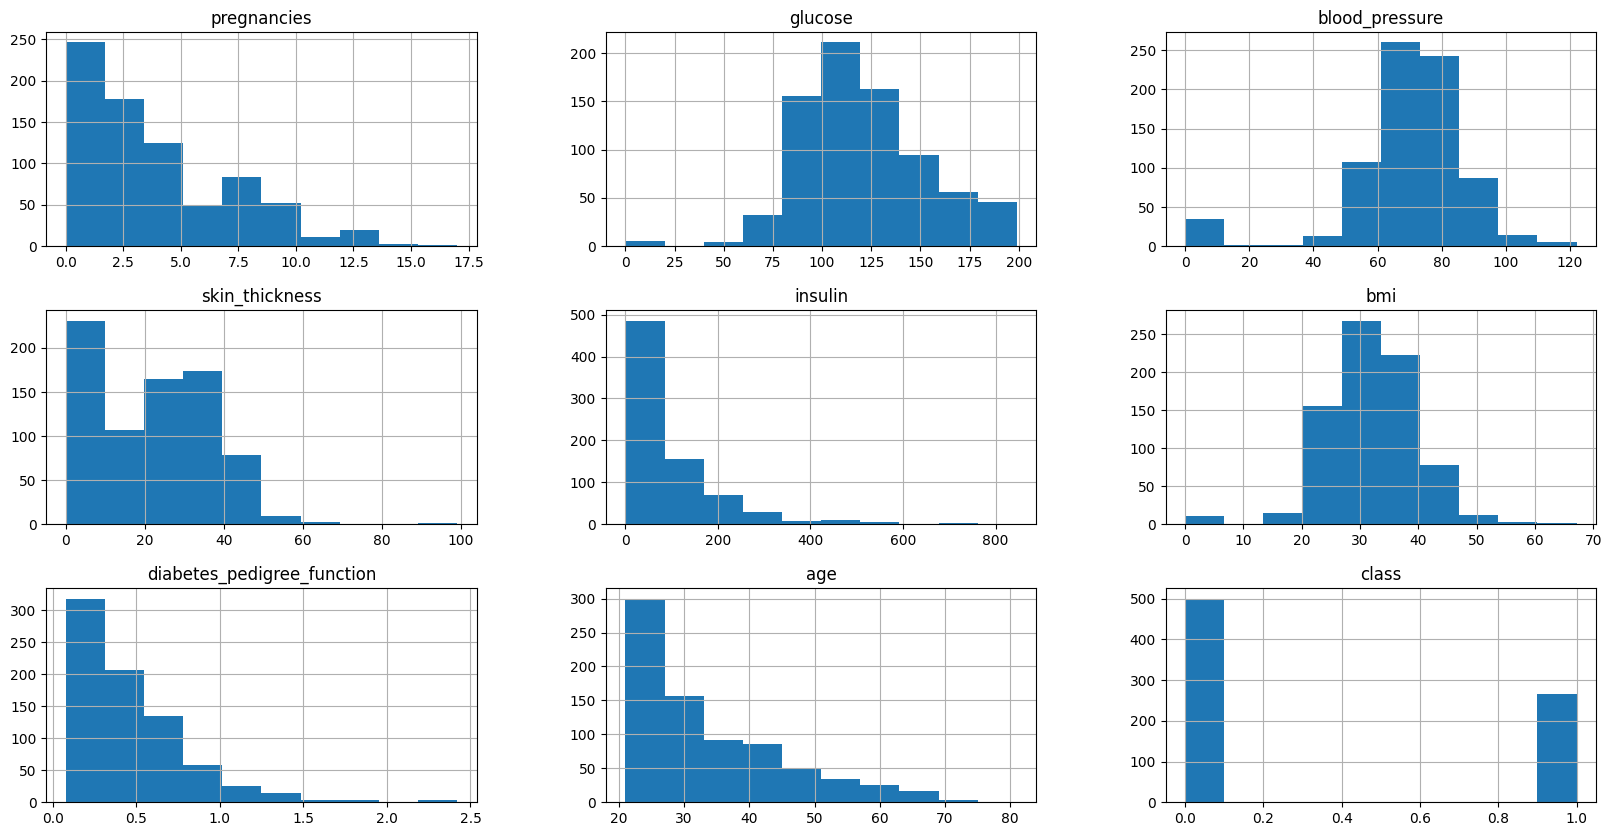

In [14]:
df.hist(figsize=(20,10))

Что мы можем сказать, посмотрев на гистограммы:
*   pregnancies - у большинства выборки было от 0 до 5 беременностей. В среднем 3.8
*   glucose - уровень глюкозы у большинства от 60 до 130. В среднем 120.86
*   blood_pressure - кровяное давление у большинства от 60 до 90. В среднем 69.1
*   skin_thickness - толщина кожи у большинства от 0 до 40. В среднем 20.5
*   insulin - инсулин у большинства выборки от 0 до 120. В среднем 79.9
*   bmi - инвекс массы тела у большинства от 20 до 45. В среднем 32
*   diabetes_pedigree_function - наследственность диабета у большинства от 0 до 1. В среднем 0.47
*   age - возраст по выборке у большинства от 20 до 40. В среднем 33.22
*   class - больше половины выборки имеет класс 0, т.е. диабет отсутствует

In [23]:
dataset = df.values
X = dataset[: , 0:8].astype(float)
Y = dataset[:,8]
Y = Y.astype(int)
print(X.shape)
print(Y.shape)
print(Y)

(767, 8)
(767,)
[0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1
 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1
 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1
 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0
 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1
 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1
 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 1
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0
 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1
 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 1 1 

*3. Создаем тренировочную и валидационную выборки.*

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=y, test_size=0.20, random_state=42)

*4. Масштабируем данные известными вам методами из библиотеки Scikit-learn.*

In [26]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

*5. Создайте функцию, при вызове которой будет собираться и компилироваться (model.compile) архитектура модели. Функция должна возвращать собранную архитектуру. Параметры слоев и их количество вы выбираете сами, стараясь добиться наилучшего качества.*

*6. Обучите модель.*

*7. Оцените качество модели по выбранной вами метрике (выбор метрики должен быть обоснован).*

*8. Постройте графики точности и графики ошибки в зависимости от количества эпох для тренировочной выборки и для валидационной.*

*9. Постройте матрицу ошибок для валидационной выборки.*

ВЫВОД:

# ЗАДАНИЕ ПРО (Не обязательно к выполнению):
Оптимизируйте параметры модели в автоматическом режиме. Можно использовать алгоритмы оптимизации типа GridSearch, но не сильно увлекаясь — иначе расчёт может быть излишне долог.

*1. Установите библиотеку scikeras, либо найдите как импортировать модуль KerasRegressor в tensorflow.*

*2. Из этой же библиотеки scikeras импортируйте модуль KerasRegressor (найдите в документации как его импортировать).*

*3. Поместите вашу модель в оболочку KerasRegressor.*

*4. Подберите оптимальные параметры для модели с помощью GridSearchCV или RandomizedSearchCV.*

*5. Посчитайте метрику с наилучшими параметрами, напишите наилучшие параметры для модели в выводе.*

**ОБЩИЙ ВЫВОД:**